# Introduction

In this notebook we will analyze the specific dataset which has been provided in kaggle in order to predict if a person will have late payment on their loans or not.

Since this is a data science problem, we will try and use some solutions which are related to this kind of problem.

The dataset has provided us with different tables, but since the only the train and test tables are a like, we will only use our analysis on the train table so that we can use it on test data too.

we will use kaggle to load the dataset.

This notebook tries to explain the complete data science problem documentation using the __CRISP-DM__

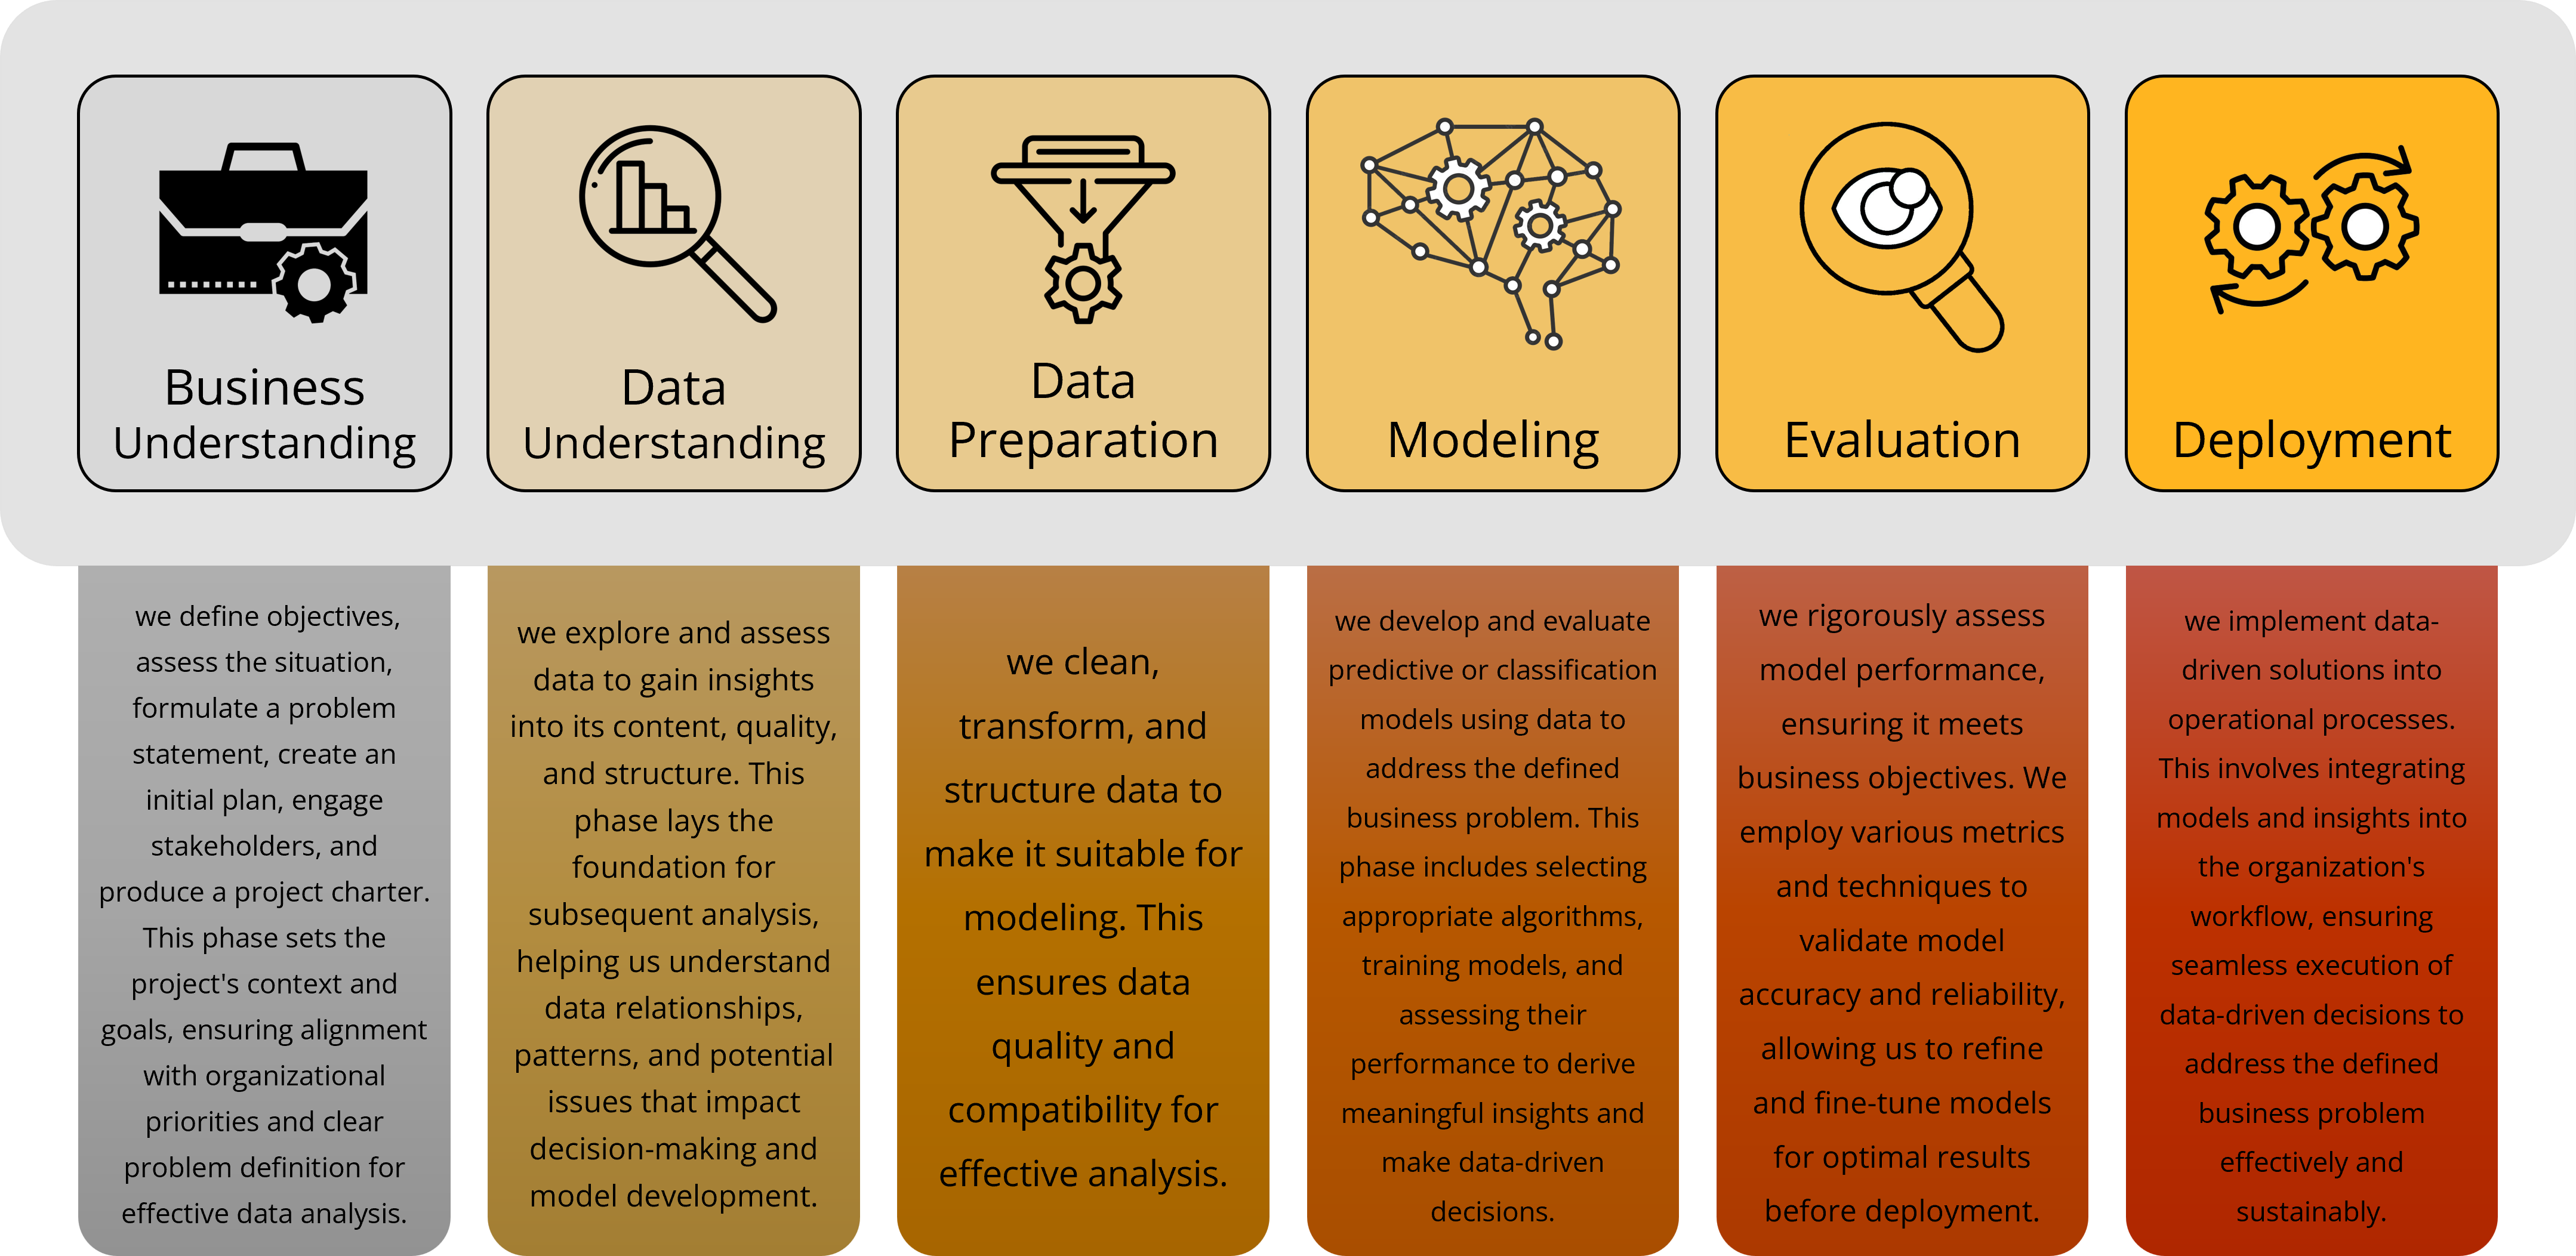

In a nutshell this methodology consists of the below steps:

    1.Business Understanding

    2.Data Understanding

    3.Data Preparation

    4.Modeling

    5.Evaluation

    6.Deployment

Each step will be completely described in the notebook.

# 1.Business Understanding

This dataset belongs to micro finance industry. This industry is a subset of fintech industry and has enabled persons and businesses to take small loans.

Microfinance is a specialized financial sector mainly dedicated to providing small-scale loans, facilitating savings, and delivering essential financial services to individuals and small businesses that typically lack access to conventional banking institutions and systems. This field operates with a unique set of challenges and opportunities in it. Users in this sector often show some special financial behaviors compared to mainstream banking clients. They tend to have irregular income streams, limited collateral, and a higher sensitivity to interest rates and fees.

Understanding the behavior of users in the microfinance domain is essential for data-driven decision-making. It involves analyzing how clients interact with financial products, manage their loans and payments, and utilize savings mechanisms. Additionally, it involves studying the impact of microfinance on the financial stability and livelihoods of users, as well as identifying trends and patterns in repayment behaviors.

By gaining some insights into user behavior, data science can play an important role in enhancing the effectiveness of microfinance institutions and also the predictability of user repayments. Data-driven strategies can shape personalized financial products, risk assessment models, and customer retention strategies, contributing to the industry's mission of fostering financial inclusion and socioeconomic development in underserved communities by trying to allocate proper loans to users based on their behavior.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
from IPython.display import clear_output
import gc

import matplotlib.pyplot as plt
import seaborn as sns

#STATS
from statsmodels.stats.outliers_influence import variance_inflation_factor

#ML
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")
clear_output()

# 2.Data Understanding

The main table that we use to analyze and train our model, is the train dataframe which consists of 120 columns (features), each describing a criteria which has been used in evaluating the customers.

In [2]:
train_df = pd.read_csv("/kaggle/input/loan-dataset/application_train.csv")
train_cols = train_df.columns
display(train_df.info(show_counts=True))

# AMT_INCOME_TOTAL = Income of the client
# AMT_CREDIT = Credit amount of the loan
# AMT_ANNUITY = Loan annuity
# AMT_GOODS_PRICE = For consumer loans it is the price of the goods for which the loan is given
# NAME_TYPE_SUITE = Who was accompanying client when he was applying for the loan
# NAME_INCOME_TYPE = Clients income type (businessman, working, maternity leave)
# NAME_EDUCATION_TYPE = Level of highest education the client achieved
# NAME_FAMILY_STATUS = Family status of the client
# NAME_HOUSING_TYPE = What is the housing situation of the client (renting, living with parents, ...)
# REGION_POPULATION_RELATIVE = Normalized population of region where client lives (higher number means the client lives in more pop...
# DAYS_BIRTH = Client's age in days at the time of application
# DAYS_EMPLOYED = How many days before the application the person started current employment
# DAYS_REGISTRATION = How many days before the application did client change his registration
# DAYS_ID_PUBLISH = How many days before the application did client change the identity document with which he applied f...
# OWN_CAR_AGE = Age of client's car
# FLAG_MOBIL = Did client provide mobile phone (1=YES, 0=NO)
# FLAG_EMP_PHONE = Did client provide work phone (1=YES, 0=NO)
# FLAG_WORK_PHONE = Did client provide home phone (1=YES, 0=NO)
# FLAG_CONT_MOBILE = Was mobile phone reachable (1=YES, 0=NO)
# FLAG_PHONE = Did client provide home phone (1=YES, 0=NO)
# FLAG_EMAIL = Did client provide email (1=YES, 0=NO)
# OCCUPATION_TYPE = What kind of occupation does the client have
# CNT_FAM_MEMBERS = How many family members does client have
# REGION_RATING_CLIENT = Our rating of the region where client lives (1,2,3)
# REGION_RATING_CLIENT_W_CITY = Our rating of the region where client lives with taking city into account (1,2,3)
# WEEKDAY_APPR_PROCESS_START = On which day of the week did the client apply for the loan
# HOUR_APPR_PROCESS_START = Approximately at what hour did the client apply for the loan
# REG_REGION_NOT_LIVE_REGION = Flag if client's permanent address does not match contact address (1=different, 0=same, at region le...
# REG_REGION_NOT_WORK_REGION = Flag if client's permanent address does not match work address (1=different, 0=same, at region level...
# LIVE_REGION_NOT_WORK_REGION = Flag if client's contact address does not match work address (1=different, 0=same, at region level)
# REG_CITY_NOT_LIVE_CITY = Flag if client's permanent address does not match contact address (1=different, 0=same, at city leve...
# REG_CITY_NOT_WORK_CITY = Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
# LIVE_CITY_NOT_WORK_CITY = Flag if client's contact address does not match work address (1=different, 0=same, at city level)
# ORGANIZATION_TYPE = Type of organization where client works
# EXT_SOURCE_1 = Normalized score from external data source
# EXT_SOURCE_2 = Normalized score from external data source
# EXT_SOURCE_3 = Normalized score from external data source
# APARTMENTS_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# BASEMENTAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# YEARS_BEGINEXPLUATATION_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# YEARS_BUILD_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# COMMONAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# ELEVATORS_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# ENTRANCES_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# FLOORSMAX_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# FLOORSMIN_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# LANDAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# LIVINGAPARTMENTS_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# LIVINGAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# NONLIVINGAPARTMENTS_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...
# NONLIVINGAREA_AVG = Normalized information about building where the client lives, What is average (_AVG suffix), modus (...



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

Since some of the types that has been chosen by pandas automatically might take the memory too much we will try and change the type of some columns.

# 3.Data Preparation

Since the data that we have might not be clean or it might have missing data which misleads our model, we need to clean the data first.

also there might be different patterns hidden in the data which could help our model predict better, we will try to find them.

In [4]:
def ChangeType(df, org_type, target_type):
    float_cols = df.select_dtypes(org_type).columns
    df.loc[:,float_cols] = df.loc[:,float_cols].astype(target_type)    
    return df

In [5]:
train_df = ChangeType(train_df, "int64", "int32")
train_df = ChangeType(train_df, "float64", "float32")
gc.collect()

474

In [6]:
nonan_cols = (
    train_df
    .isna()
    .sum(axis=0)
    /train_df.shape[0]
    *100 <= 30
)
display(train_df.loc[:,nonan_cols])
nan_cols = nonan_cols[(nonan_cols == False)].index.to_list()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

In order to find hidden patterns and also finding the behavior of our variables in this dataset, we will use __Exploratory Data Analysis (EDA)__.

Since some of the behaviors are not vivid we need to use different visuals or methods to find these patterns. (At the end we might not even find any!)

In [7]:
tmp_df = train_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "NAME_TYPE_SUITE"]]

In [8]:
na_df = tmp_df[(tmp_df["NAME_TYPE_SUITE"].isna())]
display(na_df)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE
64,180000.0,315000.0,9679.5,NaN
724,45000.0,135000.0,6750.0,NaN
1199,135000.0,533668.5,34636.5,NaN
1669,153000.0,1162170.0,30654.0,NaN
1862,121500.0,268659.0,13774.5,NaN
...,...,...,...,...
306273,67500.0,202500.0,10125.0,NaN
306544,180000.0,894825.0,23602.5,NaN
306615,180000.0,225000.0,8469.0,NaN
306636,189000.0,677664.0,21406.5,NaN


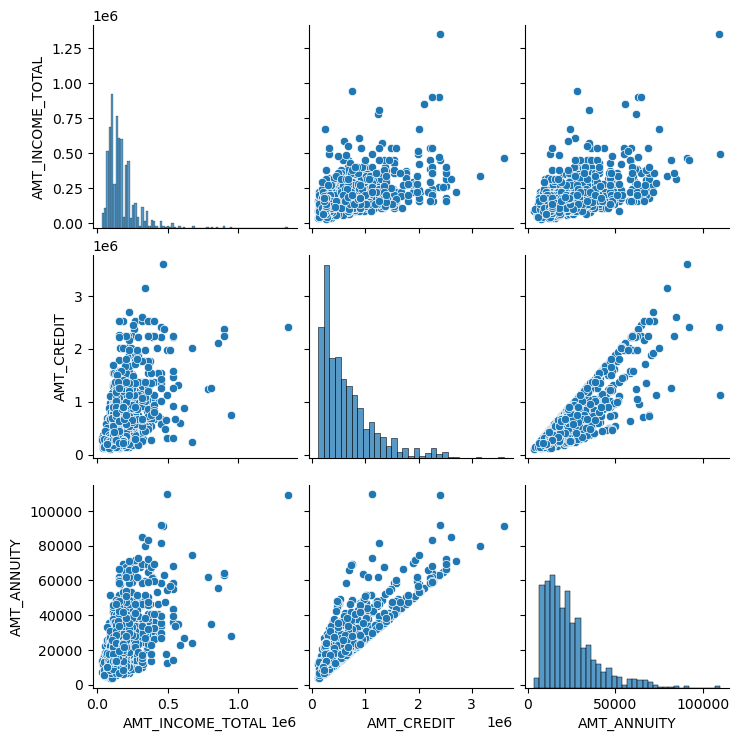

In [9]:
sns.pairplot(data=na_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]])
plt.show()
#ANNUITY HAS A LINEAR RELATIONSHIP WITH CREDIT

In [10]:
# Assuming tmp_df is your DataFrame
# Calculate the ratio of AMT_CREDIT to AMT_INCOME_TOTAL and convert to percentage
credit_income_ratio = pd.DataFrame()
credit_income_ratio["CI"] = (tmp_df["AMT_CREDIT"] / tmp_df["AMT_INCOME_TOTAL"]) * 100
# Create a bar plot for the value counts of the ratio
credit_income_ratio["AI"] = (tmp_df["AMT_ANNUITY"] / tmp_df["AMT_INCOME_TOTAL"]) * 100
credit_income_ratio.info(show_counts=True)
(credit_income_ratio["AI"].isna())
# Display the plot
# plt.title("Credit-Income Ratio")
# plt.xlabel("Credit-Income Ratio (%)")
# plt.ylabel("Count")
# plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CI      307511 non-null  float32
 1   AI      307499 non-null  float32
dtypes: float32(2)
memory usage: 2.3 MB


0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: AI, Length: 307511, dtype: bool

## FEATURE ENGINEERING

### TRAIN DATAFRAME

In [27]:
def factorize_col(df, col_name):
    cat = pd.Categorical(df[col_name])
    factorize_array, factorize_uniques = pd.factorize(cat)
    df[col_name] = factorize_array
    
    return df, factorize_uniques, cat

In [28]:
def onehot_conv(df, col_name):
    encoder = OneHotEncoder(handle_unknown="infrequent_if_exist")
    simp_imp = SimpleImputer(strategy="most_frequent")
    array = simp_imp.fit_transform(df[col_name].to_numpy()[...,np.newaxis]).ravel()
    unique_cols = np.unique(array)
    oneh_names = [f"{col_name}_{u}" for u in unique_cols]
    df[oneh_names] = encoder.fit_transform(array.reshape(-1,1)).toarray().astype(np.int8)
    
    return df, encoder

In [29]:
flag_cols = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]
train_df["FLAG_CONTACT"] = train_df[flag_cols].sum(axis=1)
train_df = train_df.drop(columns=flag_cols)

In [30]:
flag_cols = [f"FLAG_DOCUMENT_{i}" for i in range(2,22)]
train_df["FLAG_DOCUMENT"] = train_df[flag_cols].sum(axis=1)
train_df = train_df.drop(columns=flag_cols)

In [31]:
flag_cols = ["REG_REGION_NOT_LIVE_REGION",
"REG_REGION_NOT_WORK_REGION",
"LIVE_REGION_NOT_WORK_REGION",
"REG_CITY_NOT_LIVE_CITY",
"REG_CITY_NOT_WORK_CITY",
"LIVE_CITY_NOT_WORK_CITY"]
train_df["FLAG_NOTMATCH"] = train_df[flag_cols].sum(axis=1)
train_df = train_df.drop(columns=flag_cols)

In [32]:
factor_cols = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "EMERGENCYSTATE_MODE",
    "FLAG_OWN_REALTY",
    "FLAG_OWN_CAR"
]
factor_objects = {}
# train_df, emergency_unique, emergency_cat = factorize_col(train_df, col_name="EMERGENCYSTATE_MODE")
for col_name in factor_cols:
    factor_objects[col_name] = {"unique_value": None,"categories": None} 
    train_df, unique_vals, category_vals = factorize_col(train_df, col_name=col_name)
    factor_objects[col_name]["unique_value"] = unique_vals
    factor_objects[col_name]["categories"] = category_vals

# print(factor_objects)

In [33]:
org_counts = train_df["ORGANIZATION_TYPE"].value_counts(normalize=True)
replace_org_list = org_counts[(org_counts<=0.01)].index.to_list()
train_df["ORGANIZATION_TYPE"] = train_df["ORGANIZATION_TYPE"].replace(replace_org_list, "Other")

In [34]:
org_counts = train_df["OCCUPATION_TYPE"].value_counts(normalize=True)
replace_occ_list = org_counts[(org_counts<=0.01)].index.to_list()
train_df["OCCUPATION_TYPE"] = train_df["OCCUPATION_TYPE"].replace(replace_occ_list, "Other")

In [35]:
categorical_cols = [
    "WALLSMATERIAL_MODE",
    "HOUSETYPE_MODE",
    "FONDKAPREMONT_MODE",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "OCCUPATION_TYPE",
    "ORGANIZATION_TYPE"
]
oneh_objects ={} 
for col_name in categorical_cols:
    train_df, oneh_objects[col_name] = onehot_conv(train_df, col_name=col_name)
    train_df = train_df.drop(columns=[col_name])
    
print(oneh_objects)

{'WALLSMATERIAL_MODE': OneHotEncoder(handle_unknown='infrequent_if_exist'), 'HOUSETYPE_MODE': OneHotEncoder(handle_unknown='infrequent_if_exist'), 'FONDKAPREMONT_MODE': OneHotEncoder(handle_unknown='infrequent_if_exist'), 'NAME_TYPE_SUITE': OneHotEncoder(handle_unknown='infrequent_if_exist'), 'NAME_INCOME_TYPE': OneHotEncoder(handle_unknown='infrequent_if_exist'), 'NAME_EDUCATION_TYPE': OneHotEncoder(handle_unknown='infrequent_if_exist'), 'NAME_FAMILY_STATUS': OneHotEncoder(handle_unknown='infrequent_if_exist'), 'NAME_HOUSING_TYPE': OneHotEncoder(handle_unknown='infrequent_if_exist'), 'OCCUPATION_TYPE': OneHotEncoder(handle_unknown='infrequent_if_exist'), 'ORGANIZATION_TYPE': OneHotEncoder(handle_unknown='infrequent_if_exist')}


In [36]:
house_cols = [
    "APARTMENTS_AVG",
    "BASEMENTAREA_AVG",
    "YEARS_BEGINEXPLUATATION_AVG",
    "YEARS_BUILD_AVG",
    "COMMONAREA_AVG",
    "ELEVATORS_AVG",
    "ENTRANCES_AVG",
    "FLOORSMAX_AVG",
    "FLOORSMIN_AVG",
    "LANDAREA_AVG",
    "LIVINGAPARTMENTS_AVG",
    "LIVINGAREA_AVG",
    "NONLIVINGAPARTMENTS_AVG",
    "NONLIVINGAREA_AVG",
    "APARTMENTS_MODE",
    "BASEMENTAREA_MODE",
    "YEARS_BEGINEXPLUATATION_MODE",
    "YEARS_BUILD_MODE",
    "COMMONAREA_MODE",
    "ELEVATORS_MODE",
    "ENTRANCES_MODE",
    "FLOORSMAX_MODE",
    "FLOORSMIN_MODE",
    "LANDAREA_MODE",
    "LIVINGAPARTMENTS_MODE",
    "LIVINGAREA_MODE",
    "NONLIVINGAPARTMENTS_MODE",
    "NONLIVINGAREA_MODE",
    "APARTMENTS_MEDI",
    "BASEMENTAREA_MEDI",
    "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MEDI",
    "COMMONAREA_MEDI",
    "ELEVATORS_MEDI",
    "ENTRANCES_MEDI",
    "FLOORSMAX_MEDI",
    "FLOORSMIN_MEDI",
    "LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MEDI",
    "NONLIVINGAREA_MEDI",
    "TOTALAREA_MODE",
    "EMERGENCYSTATE_MODE"
]

This step Might take some time

In [37]:
avg_imputer = IterativeImputer(max_iter=20)
imput_array = avg_imputer.fit_transform(train_df[house_cols].to_numpy())

std_scaler = StandardScaler()
std_avg_cols = std_scaler.fit_transform(imput_array)

pca_avg = PCA()
pca_avg.fit(std_avg_cols)
var_ratio = np.cumsum(pca_avg.explained_variance_ratio_)
pca_components = var_ratio[(var_ratio<=0.95)].shape[0]

pca_avg = PCA(n_components=pca_components)
pca_col_names = [f"PCA_{i}" for i in range(pca_components)]
train_df[pca_col_names] = pca_avg.fit_transform(std_avg_cols)
train_df = train_df.drop(columns=house_cols)

In [38]:
day_mapping = {
    'MONDAY': 1,
    'TUESDAY': 2,
    'WEDNESDAY': 3,
    'THURSDAY': 4,
    'FRIDAY': 5,
    'SATURDAY': 6,
    'SUNDAY': 7
}
train_df["WEEKDAY_APPR_PROCESS_START"] = train_df["WEEKDAY_APPR_PROCESS_START"].map(day_mapping)

In [39]:
# Handle NA values for those who have cars
na_idx = train_df[(train_df["FLAG_OWN_CAR"]==1) & (train_df["OWN_CAR_AGE"].isna())].index
train_df.loc[na_idx, "OWN_CAR_AGE"] = train_df["OWN_CAR_AGE"].mean(skipna=True)

#handle NA values for those who doesn't have a car
train_df["OWN_CAR_AGE"] = train_df["OWN_CAR_AGE"].add(1).pow(-1)
train_df["OWN_CAR_AGE"] = train_df["OWN_CAR_AGE"].fillna(value=0)
train_df["CAR_STATUS"] = train_df["OWN_CAR_AGE"]*train_df["FLAG_OWN_CAR"]
train_df = train_df.drop(columns=["FLAG_OWN_CAR"])

In [40]:
train_df["REGION_RATING_CLIENT"] = train_df[["REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY"]].sum(axis=1)
train_df = train_df.drop(columns=["REGION_RATING_CLIENT_W_CITY"])

In [ ]:
vif_df = train_df.select_dtypes("int")
vif_df = pd.concat([vif_df, train_df.select_dtypes("float")], axis=1)
vif_df.info()

In [ ]:
vif_df = train_df.select_dtypes("int")
vif_df = pd.concat([vif_df, train_df.select_dtypes("float")], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))]

In [ ]:
vif_data.sort_values(by="VIF", ascending=False)

# 4.Model